In [12]:
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from sklearn.cluster import KMeans # type: ignore

In [3]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

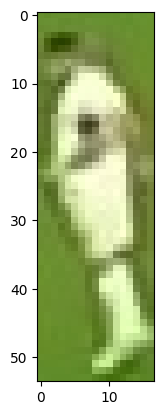

In [4]:
plt.imshow(image)
plt.show()

Get the top half of the image

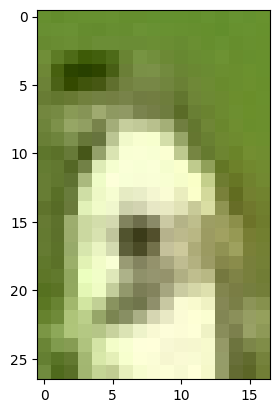

In [7]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

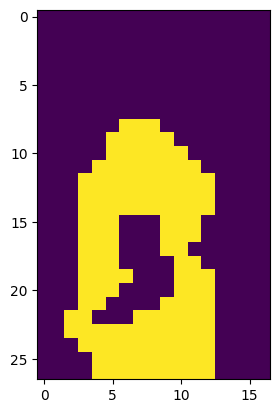

In [13]:
# reshape the top_half_image into 2d array
image_2d = top_half_image.reshape(-1,3)

#performing kmeans clustering
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(image_2d)

#cluster labels
labels = k_means.labels_

#reshaping the clustered img to the shape of the original image 
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Showing the clustered image
plt.imshow(clustered_image)
plt.show()


In [14]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [15]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [16]:
k_means.cluster_centers_[player_cluster]

array([224.02857143, 230.2       , 182.48571429])